In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-23.csv")
df1 = pd.read_csv("https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-24.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-25.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-26.csv")
df4 = pd.read_csv("https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-27.csv")
df5 = pd.read_csv("https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-30.csv")
df6 = pd.read_csv("https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-31.csv")


df = pd.concat(df, df1, df2, df3,df4, df5, df6)
df.head()


In [5]:
df[df.tripId == 6351558574044883205]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71517 entries, 0 to 71516
Data columns (total 12 columns):
index          71517 non-null int64
time_stamp     71517 non-null object
stop           71517 non-null int64
stopName       71517 non-null object
number         71517 non-null int64
direction      71517 non-null object
plannedTime    71517 non-null object
vehicleId      64221 non-null float64
tripId         71517 non-null int64
status         71517 non-null object
delay          71517 non-null int64
seq_num        70833 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 6.5+ MB


In [4]:
df.delay.value_counts(normalize=True)

0     0.426905
1     0.344715
2     0.123509
3     0.055987
4     0.025421
5     0.011410
6     0.004852
7     0.002657
8     0.001189
9     0.000867
10    0.000587
14    0.000503
12    0.000475
11    0.000350
13    0.000336
15    0.000154
16    0.000042
19    0.000028
18    0.000014
Name: delay, dtype: float64

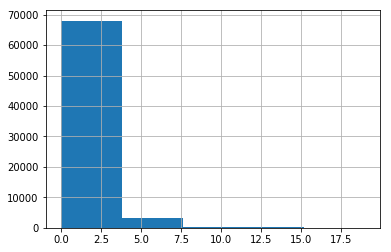

In [78]:
df.delay.hist(bins=5)

In [79]:
df.delay.describe()

count    71517.000000
mean         1.014039
std          1.357324
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         19.000000
Name: delay, dtype: float64

# Model building

In [6]:
df.columns

Index(['index', 'time_stamp', 'stop', 'stopName', 'number', 'direction',
       'plannedTime', 'vehicleId', 'tripId', 'status', 'delay', 'seq_num'],
      dtype='object')

In [7]:
pd.factorize(['{}{}'.format(7,'b')])[0]
pd.factorize(['{7}{"b"}'])[0]

array([0])

In [8]:
df["number_direction_id"] = df.apply(lambda x: '{} {}'.format(x["number"], x["direction"]), axis = 1).factorize()[0]
df["stop_direction_id"] = df.apply(lambda x: '{} {}'.format(x["stop"], x["direction"]), axis = 1).factorize()[0]

In [9]:
df.head()

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num,number_direction_id,stop_direction_id
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0,0,0
1,1,2018-07-23 06:00:47,612,Borsucza,22,Walcownia,2018-07-23 06:00:00,6.352185e+18,6351558574044899587,STOPPING,0,7.0,1,1
2,1,2018-07-23 06:00:48,572,Smolki,11,Czerwone Maki P+R,2018-07-23 06:00:00,6.352185e+18,6351558574044670211,STOPPING,0,10.0,2,2
3,1,2018-07-23 06:00:49,319,Jubilat,1,Wzgórza K.,2018-07-23 05:59:00,NaN,6351558574044363010,PLANNED,1,3.0,3,3
4,1,2018-07-23 06:00:49,322,Filharmonia,8,Bronowice Małe,2018-07-23 06:01:00,6.352185e+18,6351558574044592386,STOPPING,0,15.0,4,4


In [10]:
df[['plannedTime']].info()
df['plannedTime'] = pd.to_datetime(df['plannedTime'])
df['plannedTime'].dt.hour.value_counts()
df['hour'] = df['plannedTime'].dt.hour

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71517 entries, 0 to 71516
Data columns (total 1 columns):
plannedTime    71517 non-null object
dtypes: object(1)
memory usage: 558.8+ KB


In [11]:
df['direction'].unique()
df['direction'].value_counts()
df['direction_cat'] = df['direction'].factorize()[0]
df['vehicleId'].fillna(-1, inplace=True)
df['seq_num'].fillna(-1, inplace=True)
df['delay_second'] = df.delay.map(lambda x: x*60)

In [12]:

feats = ['number', 
         'stop',
         'direction_cat', 
         'vehicleId', 
         'seq_num',
         ]

In [13]:
X = df[ feats].values
y = df.delay_second.values

In [14]:

model = DecisionTreeRegressor(max_depth=10, random_state=0)
score = cross_val_score(model, X,y, cv=3, scoring = "neg_mean_absolute_error")
np.mean(score), np.std(score)

(-48.875873701150844, 2.5311262734011124)

In [15]:
model = RandomForestRegressor(max_depth=10, n_estimators=10, random_state=0)
score = cross_val_score(model, X,y, cv=3, scoring = "neg_mean_absolute_error")
np.mean(score), np.std(score)

(-48.33421075688341, 2.4452264220070563)